# Interactive Visualization Lab

Complete the following set of exercises to solidify your knowledge of interactive visualization using Plotly, Cufflinks, and IPyWidgets.

In [1]:
%pip install chart-studio
%pip install cufflinks

import pandas as pd
from chart_studio import plotly as py
import cufflinks as cf
from ipywidgets import interact

cf.go_offline()

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 1. Create an interactive bar chart showing total quantity and revenue by country (excluding United Kingdom) for the month of April 2011.

In [2]:
df=pd.read_excel('../data/Online Retail.xlsx')

df.head(3)

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
1,536373,2010-12-01 09:02:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
2,536375,2010-12-01 09:32:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom


In [3]:
data=df[df.Country!='United Kingdom']

data=data.loc[(data.InvoiceDate >= '2011-4-1') & (data.InvoiceDate <= '2011-4-30')]

data.head(3)

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
724,549667,2011-04-11 12:20:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.95,17.70,14911,EIRE
807,551163,2011-04-26 15:52:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,9,2.95,26.55,12573,France
3320,550899,2011-04-21 12:07:00,22752,SET 7 BABUSHKA NESTING BOXES,2,8.50,17.00,13505,Switzerland


## 2. Create an interactive line chart showing quantity and revenue sold to France between January 1st and May 31st 2011.

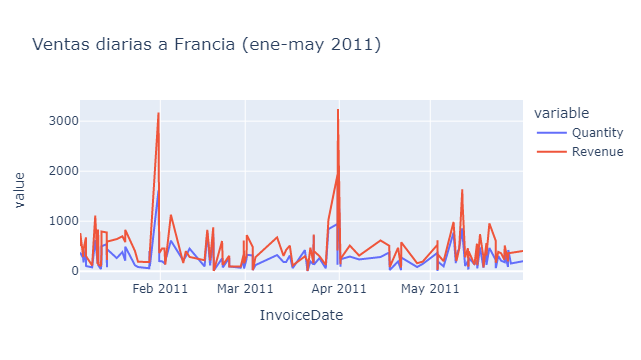

In [4]:
import plotly.express as px

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

france_sales = df[(df['Country'] == 'France') & (df['InvoiceDate'].dt.year == 2011) & (df['InvoiceDate'].dt.month <= 5)]

daily_sales = france_sales.groupby('InvoiceDate').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

fig = px.line(daily_sales, x='InvoiceDate', y=['Quantity', 'Revenue'], title='Ventas diarias a Francia (ene-may 2011)')

fig.show()


## 3. Create an interactive scatter plot showing the relationship between average quantity (x-axis) and average unit price (y-axis) for the product PARTY BUNTING with the plot points color-coded by country (categories).

C:\Users\mocus\anaconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

C:\Users\mocus\anaconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



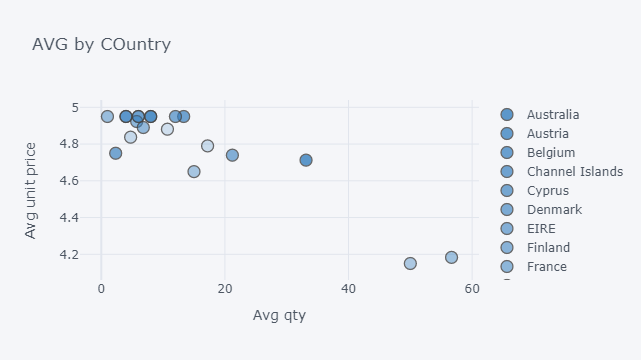

In [5]:
# media cantidad

data=df.loc[df.Description=='PARTY BUNTING']

data=data.groupby('Country').mean()
data=data[['Quantity', 'UnitPrice']]


data.reset_index(inplace=True)


data.iplot(x='Quantity', y='UnitPrice', categories='Country',
           xTitle='Avg qty', yTitle='Avg unit price',
           color='blue', title='AVG by COuntry')

## 4. Create a set of interactive histograms showing the distributions of quantity per invoice for the following countries: EIRE, Germany, France, and Netherlands.

## 5. Create an interactive side-by-side bar chart showing the revenue by country listed below (bars) for each of the products listed below.

## 6. Create an interactive line chart showing quantity sold by day for the United Kingdom. Add drop-down boxes for Year and Month that allow you to filter the date range that appears in the chart.

## 7. Create an interactive scatter plot that plots number of invoices (x-axis) vs. number of customers (y-axis) and the plot points represent individual products. Add two sliders that control the x and y axis ranges.

## 8. Creat an interactive bar chart that shows revenue by product description. Add a text field widget that filters the results to show the product that contain the text entered in their description.